# 2 Probability: univariate models

# 2.1 Introduction

## 2.1.1 What is probability?
Two different interpretations of probability.
- ***Frequentist interpretation***: Long run **frequencies of events** that can happen multiple times.
- ***Bayesian interpretation***: **Quantification of our uncertainty or ignorance** about something. 
Fundamentally related to **information** rather than repeated trials.

Example: ***The probability that a (fair) coin will land heads is 50%***
- ***Frequentist***: If we flip the coin **many times repeatedly**, we expect it to land heads about half the time.
- ***Bayesian***: We believe that the coin is equally likely to land heads or tails on the next toss. 

## 2.1.2 Types of uncertainty
- ***Epistemic uncertainty (or model uncertainty)***: Ignorance of the **underlying hidden causes or mechanism** generating our data. 
- ***Aleatoric uncertainty (or data uncertainty)***: **Intrinsic variability** which cannot be reduced even if we collect more data.

Example: Tossing a fair coin.
- We know that the probability of heads is $p = 0.5$, thus **no epistemic uncertainty**
- But we still cannot perfectly predict the outcome of the next toss: **Aleatoric uncertainty** due to the intrinsic variability.


## 2.1.3 Probability as an extension of logic

### 2.1.3.1 Probability of an event.
- **Event** : Some state of the world that either holds or does not hold.

- $Pr(A)$: Probability of event $A$.

- For any event $A$, &nbsp; $0 \leq Pr(A) \leq 1$.

- $Pr(\overline{A}) = 1 - Pr(A)$

### 2.1.3.2 Probability of a conjunction of two events
- $Pr(A \land B) = Pr(A,B)$

- $Pr(A,B) = Pr(A)Pr(B)$ &nbsp; if $A$ and $B$ are independent. 

### 2.1.3.3 Probabilitiy of a union of two events
- $Pr(A \lor B) = Pr(A) + Pr(B) - Pr(A \land B)$

- $Pr(A \lor B) = Pr(A) + Pr(B)$ &nbsp; if $A$ and $B$ are independent.

### 2.1.3.4 Conditional probability of one event given another
- $Pr(B \vert A) := \frac{Pr(A,B)}{Pr(A)}$ &nbsp; Conditional probability of $B$ given that $A$ has occurred. ($Pr(A) \neq 0$).

### 2.1.3.5 Conditional independence of events
- $A$ is **conditionally independent** of $B$ if $Pr(A \vert B) = Pr(A)$ or equivalently, $Pr(B \vert A) = Pr(B)$. Hence, $Pr(A,B) = Pr(A)Pr(B)$

- $A$ and $B$ are **conditionally independent given a third event $C$** if $Pr(A\vert B,C) = Pr(A\vert C)$ or equivalently, $Pr(A,B \vert C) = Pr(A \vert C)Pr(B \vert C)$


# 2.2 Random variables

**Random variables** : If some quantity of interest $X$ is **unknown** and/or **could change**, it is called **random variable** or **rv**.

**Sample space** : **Set of possible values** of random variable $X$.
- Example> If $X$ denotes the face of dice. Then **sample space of** $X = \{1,2,3,4,5,6\}$.

**Event** : **Set of outcomes** from a given sample space. 
- Example> Event of *"seeing an odd number"* from the dice: $X \in \{1,3,5\}$.

## 2.2.1 Discrete random variables
If the sample space is **finite** or **countably infinite**, then $X$ is called a **discrete random variable**.

**Probability mass function (pmf)** : $p(x) := Pr(X=x)$

If $p(x)$ denotes the pmf of rv $X$, then
- $0 \leq p(x) \leq 1$
- $\Sigma_{x \in \chi}p(x) = 1$

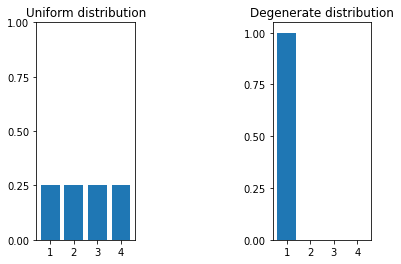

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(1,5)
Uni_Pmf = np.repeat(1.0/len(X), len(X))

def Plot_Pmf(Pmf, index, title):
    plt.subplot(1,3,index)
    plt.bar(X, Pmf, align='center')
    plt.title(title)
    plt.xticks(X)
    plt.yticks(np.linspace(0, 1, 5))
    
Plot_Pmf(Uni_Pmf, 1, 'Uniform distribution')          # Discrete Uniform distribution
Plot_Pmf([1,0,0,0], 3, 'Degenerate distribution')     # Degenerate distribution

plt.show()

## 2.2.2 Continuous random variables
X is called **continuous random variable**, if it takes values in a **continuous set** $V \in \mathbb{R}$. 

### 2.2.2.1 Cumulative distribution function (cdf)
For continuous rv $X$, 
- $Pr(X \leq b) = Pr(X \leq a) + Pr(a < X \leq b)$
- $Pr(a < X \leq b) = Pr(X \leq b) - Pr(X \leq a)$

Define **cumulative distribution function (cdf)** as:
- $P(x) := Pr(X \leq x)$

Then, we get
- $Pr(a < X \leq b) = P(b) - P(a)$

### 2.2.2.2 Probability density function (pdf)
Define **probability density function (pdf)** as the derivative of the cdf:
- $p(x) := \frac{d}{dx}P(x)$

So, we have
- $ Pr(a < X \leq b) = \int_a^bp(x)dx = P(b) - P(a)$

As the size of the interval gets smaller, we can write
- $ Pr(x \leq X \leq x+dx) \simeq p(x)dx$

### 2.2.2.3 Quantiles
If the cdf $P$ is **strictly monotonically increasing**, then it has an inverse. We call this inverse function as **inverse cdf** or **percent point function (ppf)** or **quantile function**.

If $P$ is the cdf of rv $X$, then $P^{-1}(q) = x_q \,\, s.t. \, Pr(X\leq x_q) = q$. &nbsp; $x_q$ : $q$'th **quantile** of $P$.
- $P^{-1}(0.5)$ : **Median** of the distribution
- $P^{-1}(0.25) \, , \, P^{-1}(0.75)$ : **Lower (first), Upper (third) quartiles**

Let $\Phi$ be the cdf of standard normal distribution $\mathcal{N}(0,1)$, so that $\Phi^{-1}$ be the inverse cdf.
- Points to the left of $\Phi^{-1}(\alpha/2)$ contain $\alpha/2$ of probability mass.
- Points to the right of $\Phi^{-1}(1-\alpha/2)$ also contain $\alpha/2$ of probability mass by symmetry.
- Hence, $(\Phi^{-1}(\alpha/2), \Phi^{-1}(1-\alpha/2))$ **contains $1-\alpha$ of the mass**.
- ex> If $\alpha = 0.05$, the interval $(\Phi^{-1}(0.025), \Phi^{-1}(0.975)) = (-1.96, 1.96)$ **contains 95% of the mass**.

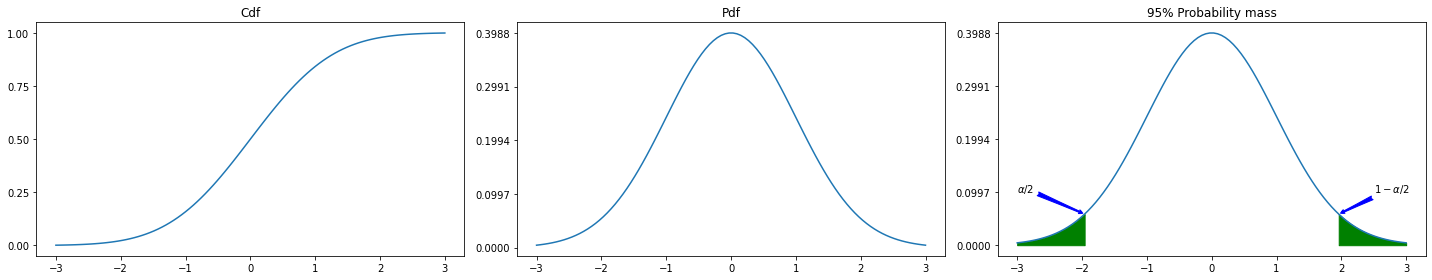

In [34]:
# Plot of cdf, pdf of standard normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

domain = np.linspace(-3, 3, 100)
norm_pdf = norm.pdf(domain)           # Standard normal by default (log = 0, scale = 1)
norm_cdf = norm.cdf(domain)           # Standard normal by default (log = 0, scale = 1)

def Plot_Normal(func, index, title):
    plt.subplot(1,3,index)
    plt.plot(domain, func)
    plt.title(title)
    plt.xticks(np.linspace(-3, 3, 7))
    plt.yticks(np.linspace(0, np.max(func) if index != 1 else 1, 5))
    
def Plot_Quantile(func, alpha, title):
    plt.subplot(1,3,3)
    plt.plot(domain, func)
    
    left_sep = norm.ppf(alpha/2.0)        # Standard normal by default (log = 0, scale = 1)
    right_sep = norm.ppf(1 - alpha/2.0)   # Standard normal by default (log = 0, scale = 1)
    
    left_domain = np.linspace(-3, left_sep, 100)
    right_domain = np.linspace(right_sep, 3, 100)
    
    plt.fill_between(left_domain, norm.pdf(left_domain), color = 'g')
    plt.fill_between(right_domain, norm.pdf(right_domain), color = 'g')
    
    plt.annotate(r'$\alpha/2$', xy=(left_sep, norm.pdf(left_sep)), xytext = (-3.0 , 0.1), arrowprops = dict(arrowstyle = 'fancy', color = 'blue'))
    plt.annotate(r'$1-\alpha/2$', xy=(right_sep, norm.pdf(right_sep)), xytext = (2.5 , 0.1), arrowprops = dict(arrowstyle = 'fancy', color = 'blue'))
    
    plt.title(title)
    plt.xticks(np.linspace(-3, 3, 7))
    plt.yticks(np.linspace(0, np.max(func), 5))

plt.figure(figsize = (20,4))
Plot_Normal(norm_cdf, 1, 'Cdf')
Plot_Normal(norm_pdf, 2, 'Pdf')
Plot_Quantile(norm_pdf, 0.05, '95% Probability mass')
plt.tight_layout()
plt.show()
    

## 2.2.3 Sets of related random variables
**Joint distribution** of the two random variables $X$, $Y$ : $p(x,y) = p(X = x, Y = y)$.

**Marginal distribution** of the random variable $X$ : $p(X = x) = \Sigma_y \, p(X = x, Y = y)$.
- Called **sum rule** or **rule of total probability**.

**Conditional distribution** of the rv $Y$ given $X$ : $p(Y=y\vert X=x) = \frac{p(X=x,Y=y)}{P(X=x)}$
- **Product rule** : $p(x,y) = p(x)p(y\vert x)$
- **Chain rule of probability** : $p(x_{1:D}) = p(x_1)p(x_2\vert x_1)p(x_3\vert x_1, x_2) ... p(x_D\vert x_{1:D-1})$

## 2.2.4 Independence and conditional independence
Random varaibles $X$ and $Y$ are **unconditionally independent** or **marginally independent** iff $p(X,Y) = p(X)p(Y)$. &nbsp; Denoted $X \perp Y$.
- Generally, $X_1, ... X_n$ are independent $\iff p(X_1, ... X_n) = \Pi_{i=1}^n p(X_i)$

Random variables $X$ and $Y$ are **conditionally independent (CI)** given $Z$ iff $p(X,Y\vert Z) = p(X\vert Z)p(Y\vert Z)$
- Formally, $X\perp Y \vert Z \iff p(X,Y\vert Z) = p(X\vert Z)p(Y \vert Z)$

## 2.2.5 Moments of a distribution

### 2.2.5.1 Mean of a distribution
**Mean** or **Expected value** or **Expectation** of random variable, often denoted by $\mu$, is defined as:
- Discrete rv: $\mathbb{E}[X] := \Sigma xp(x)$
- Continuous rv: $\mathbb{E}[X] := \int xp(x)dx$

Properties of Expectation:
- $\mathbb{E}[aX+b] = a\mathbb{E}[X] + b$  (**Linearity of expectation**)
- $\mathbb{E}[\Sigma_{i=1}^nX_i] = \Sigma_{i=1}^n \mathbb{E}[X_i]$
- If $X_i$'s are independent, $\mathbb{E}[\Pi_{i=1}^nX_i] = \Pi_{i=1}^n \mathbb{E}[X_i]$

### 2.2.5.2 Variance of a distribution
**Variance** is a measure of the *spread* of a distribution, often denoted by $\sigma^2$, defined as:
- $\mathbb{V}[X] := \mathbb{E}[(X-\mu)^2]$

Hence, $\mathbb{E}[X^2] = \sigma^2 + \mu^2$

The **standard deviation** is defined as : 
- $std[X] := \sqrt{\mathbb{V}[X]} = \sigma$

Properties of Variance:
- $\mathbb{V}[aX+b] = a^2\mathbb{V}[X]$
- If $X_i$'s are independent, $\mathbb{V}[\Sigma_{i=1}^n] = \Sigma_{i=1}^n\mathbb{V}[X_i]$
- If $X_i$'s are independent, $\mathbb{V}[\Pi_{i=1}^nX_i] = \Pi_{i=1}^n(\sigma_i^2 + \mu_i^2) - \Pi_{i=1}^n \mu_i^2$

### 2.2.5.3 Mode of a distribution
The **mode** of a distribution is the value with the highest probability mass or probability density.
- $x^* =$ argmax$_x\,p(x)$

### 2.2.5.4 Conditional moments
**Law of total expectation** : $\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X\vert Y]]$
- Example> $\mathbb{E}[X\vert Y=1] = 5000, \,\mathbb{E}[X\vert Y=2] = 4000, \,p(Y=1) = 0.6, \,p(Y=2) = 0.4$, then $\mathbb{E}[X] = \mathbb{E}[X\vert Y=1]p(Y=1) + \mathbb{E}[X\vert Y=2]p(Y=2) = 5000*0.6 + 4000*0.4 = 4600$.

**Conditional variance formula** : $\mathbb{V}[X] = \mathbb{E}[\mathbb{V}[X\vert Y]] + \mathbb{V}[\mathbb{E}[X\vert Y]]$

# 2.3 Bayes' rule
A formula for computing the probability distribution over possible values of an **unknown (or hidden) quantity $H$** given some **observed data $Y=y$**.
$$p(H=h\vert Y=y) = \frac{p(H=h)p(Y=y\vert H=h)}{P(Y=y)}$$
- **Prior distribution** $p(H)$ : What we know about the possible values of unknown quantity $H$ before we see any data.
- **Observation distribution** $p(Y\vert H=h)$ : Distribution over the possible outcomes $Y$ we expect to see, given that $H=h$.
    - **Likelihood** $p(Y=y\vert H=h)$
    - **Marginal likelihood** $p(Y=y)$
- **Posterior distribution** $p(H=h\vert Y=y)$ : Our new **belief state** about the possible values of $H$.

**Bayesian inference (Posterior inference)** : An inference that uses Bayes rule to **update a distribution over unknown values of some quantity of interest, given relevant observed data**.

## 2.3.1 Example: Testing for COVID-19
- $H = 1$ : Infected, &nbsp; $H = 0$ : Not infected, &nbsp; (Unknown values of interest)
- $Y = 1$ : Test positive, &nbsp; $Y = 0$ : Test negative. &nbsp; (Observation)
- **Likelihoods** (Set properly according to real statistics)
    - **True positive rate (i.e. Sensitivity)** : $p(Y=1\vert H=1) = 0.875$
    - **True negative rate (i.e. Specificity)** : $p(Y=0\vert H=0) = 0.975$
    - **False positive rate (Observed positive but indeed false)** : $p(Y=1\vert H=0) = 1 - p(Y=0\vert H=0 ) = 0.025$
    - **False negative rate (Observed negative but indeed true)** : $p(Y=0\vert H=1) = 1 - p(Y=1\vert H=1) = 0.125$
- **Prior distribution** (Set properly according to real statistics)
    - $p(H = 1) = 0.1$, &nbsp; $p(H = 0) = 0.9$ 
- **Marginal likelihood**
    - $p(Y = 1) = p(Y=1\vert H=0)p(H=0) + p(Y=1\vert H=1)p(H=1) = 0.025*0.9 + 0.875*0.1 = 0.11$
    - $p(Y = 0) = p(Y=0\vert H=0)p(H=0) + p(Y =0\vert H=1)p(H=1) = 0.975*0.9 + 0.125*0.1 = 0.89$
- **Posterior distribution**
    - $p(H=1\vert Y=1) = \frac{p(H=1)p(Y=1\vert H=1)}{p(Y=1)} = \frac{0.1*0.875}{0.11} = 0.795$ &nbsp; (probability of being infected given a positive test.)
    - $p(H=1\vert Y=0) = \frac{p(H=1)p(Y=0\vert H=1)}{p(Y=0)} = \frac{0.1*0.125}{0.89} = 0.014$ &nbsp; (probability of being infected given a negative test.)
    
## 2.3.2 Example: The Monty Hall problem
**Rule**: There are 3 doors, labelled 1,2,3. A single prize has been hidden behind one of these. Participant has to select one door. Then the host opens one of the other two doors behind which there is no prize. After that, the participant has two choices: stick with his/her first choice, or switch to the other option.

**Prior distribution**: $H_i$ denotes the event that there is a prize behind the door $i$.
- $p(H_1) = p(H_2) = p(H_3) = 1/3$

**Likelihoods** (Suppose that the participant initially selected door 1.)
- $p(Y=2\vert H_1) = p(Y=3\vert H_1) = 1/2$
- $p(Y=2\vert H_2) = 0$ &nbsp; $p(Y=3\vert H_2) = 1$
- $p(Y=2\vert H_3) = 1$ &nbsp; $p(Y=3\vert H_3) = 0$

**Marginal likelihoods**
- $p(Y=2) = p(Y=3) = 0.5 * 1/3 + 1* 1/3 = 0.5$

**Posterior distribution** (Suppose that the host has shown the door 3 where there is no prize behind it.)
- $p(H_1\vert Y=3) = \frac{p(H_1)p(Y=3\vert H_1)}{p(Y=3)} = 1/3$
- $p(H_2\vert Y=3) = \frac{p(H_2)p(Y=3\vert H_2)}{p(Y=3)} = 2/3$

Thus, the participant has to choose **door 2** in second trial in order to have the biggest chance of winning the prize.


# 2.4 Bernoulli and binomial distributions

## 2.4.1 Definition
The discrete random varialbe $Y$ is said to follows **Bernoulli distribution**, if for $0\leq \theta \leq 1$ its pmf can be written as:
- $Ber(y\vert \theta) := \begin{cases} 1-\theta & \; y=0 \\ \theta & \; y=1 \end{cases}$ &nbsp; &nbsp; &nbsp; &nbsp; Formally, $Ber(y\vert \theta) := \theta^y(1-\theta)^{1-y}$

The **Binomial distribution** is the distribution of the **sum of $N$ bernoulli random variables** thus,
- $Bin(x\vert N,\theta) := {N \choose x}\theta^x(1-\theta)^{1-x}$ &nbsp; &nbsp; where ${N \choose x} = \frac{N!}{(N-x)!x!}$

If $N = 1$, binomial distribution becomes bernoulli distribution.

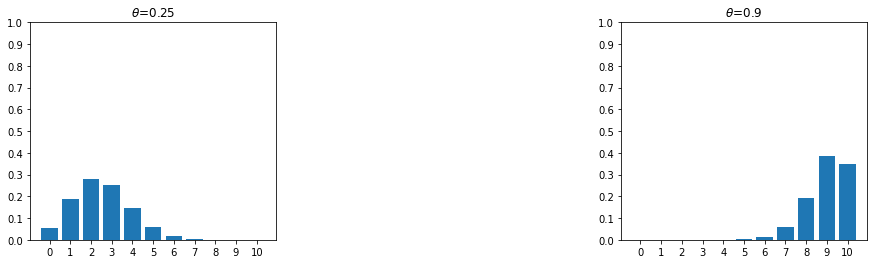

In [7]:
## Pmf of Binomial distribution with N = 10 and (a) theta = 0.25 , (b) theta = 0.9
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def Plot_Binom_Pmf(N, theta, index, title):
    X = np.arange(0, N+1)
    Y = binom.pmf(X, N, theta)
    plt.subplot(1,3,index)
    plt.bar(X, Y)
    plt.xticks(X)
    plt.yticks(np.arange(0,1.1,step=0.1))
    plt.title(title)
    
plt.figure(figsize = (15,4))
Plot_Binom_Pmf(10, 0.25, 1, r'$\theta$' + "=" + str(0.25))
Plot_Binom_Pmf(10, 0.9, 3, r'$\theta$' + "=" + str(0.9))
plt.show()

## 2.4.2 Sigmoid (logistic) function
We want to predict a binary variable $y \in \{0,1\}$ given some inputs $x$ by using **conditional probability distribution** of the form:
- $p(y\vert x,\theta) = Ber(y\vert f(x;\theta))$

Here, $0\leq f(x;\theta) \leq 1$ is required due to the definition of the **Bernoulli distribution**. To avoid the restriction, we use the following model instead:
- $p(y\vert x,\theta) = Ber(y\vert \sigma(f(x;\theta)))$ &nbsp;&nbsp;&nbsp; where $\sigma(x) := (1+e^{-x})^{-1}$ is the **sigmoid (logistic) function**.

We use sigmoid function because it maps whole real line to $[0,1]$, which is necessary for the output to be interpreted as probability.

If we let $f(x;\theta) = a$,
- $p(y=1\vert x,\theta) = \sigma(a)$
- $p(y=0\vert x,\theta) = \sigma(-a)$
- Here, $a = log(\frac{p}{1-p})$ &nbsp; &nbsp; where $p = p(y=1\vert x,\theta)$.

Thus, the **sigmoid function** maps the log-odds $a$ to $p$:
- $p = \sigma(a) := \frac{1}{1+e^{-a}}$

The inverse of this is called **logit function**, and maps $p$ to the log-odds $a$:
- $a = logit(p) = \sigma^{-1}(p) := log(\frac{p}{1-p})$

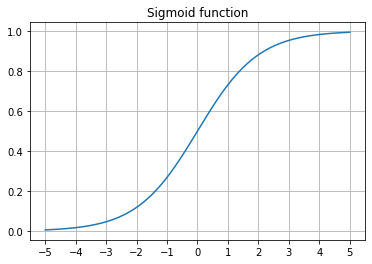

In [12]:
# Simple plot of the sigmoid function
import numpy
import matplotlib.pyplot as plt

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

X = np.linspace(-5, 5, 200)
Y = sigmoid(X)

plt.title('Sigmoid function')
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.grid(True)
plt.plot(X, Y)
plt.show()


## 2.4.3 Binary logistic regression
**Logistic regression**: Using conditional Bernoulli model, where we use a **linear predictor** of the form $f(x;\theta) = w^{T}x + b$.
- $p(y\vert x;\theta) = Ber(y\vert \sigma(w^{T}x + b))$
- $p(y=1\vert x;\theta) = \sigma(w^{T}x + b) = \frac{1}{1+e^{-(w^{T}x + b)}}$

The **decision boundary** is the value $x^*$ where $p(y=1\vert x=x^*,\theta) = 0.5$.

# 2.5 Categorical and multinomial distributions

## 2.5.1 Definition
The **categorical distribution** is a discrete probability distribution with one parameter per class:
- $Cat(y\vert \theta) := \Pi_{c=1}^C \theta_c^{\mathbb{I}(y=c)}$ &nbsp; &nbsp; &nbsp; &nbsp; $Cat(\mathbf{y} \vert \theta) := \Pi_{c=1}^C \theta_c^{y_c}$ &nbsp; (One-hot encoding notation) 
- Generalization of the Bernoulli to more than 2 class labels.

**Multinomial distribution** is the distribution sum of $N$ categorical random variables thus,
- $Mu(s\vert N,\theta) := {N \choose s_1, ... ,s_C}\Pi_{c=1}^C \theta_c^{s_c}$ &nbsp; &nbsp; where ${N \choose s_1, ... ,s_C} := \frac{N!}{s_1!s_2!...s_C!}$

if $N=1$ multinomial distributions becomes categorical distribution.

## 2.5.2 Softmax function
We want to predict a class label $y \in \{1,...,C\}$ given some inputs $x$ by using **conditional probability distribution** of the form:
- $p(y\vert \mathbf{x},theta) = Cat(y\vert f(\mathbf{x};\theta))$

Here, $0\leq f_c(\mathbf{x};\theta) \leq 1$ and $\Sigma_{c=1}^C f_c(\mathbf{x};\theta) = 1$ is required due to the definition of the **Categorical distribution**. To avoid the restriction, we use the following model instead:
- $p(y\vert \mathbf{x},\theta) = Cat(y\vert S((f(\mathbf{x};\theta)))$ &nbsp;&nbsp;&nbsp; where $S(\mathbf{a}) := [\frac{e^{a_1}}{\Sigma_{c`=1}^Ce^{a_{c`}}}, ..., \frac{e^{a_C}}{\Sigma_{c`=1}^Ce^{a_{c`}}}]$ is the **softmax function**.
- The inputs $\mathbf{a} = f(\mathbf{x};\theta)$ to the softmax function are called **logits**.

The softmax function acts a bit like the **argmax function**:
- $S(a/T)_c = \begin{cases} 1.0 & \text{if} \; c = argmax_{c'}a_{c'} \\ 0.0  & \text{otherwise} \end{cases}$ &nbsp; as $T \to 0$. &nbsp;&nbsp;&nbsp;&nbsp; $T$ is called the **temperature**.
- At low temperatures, the distribution puts most of its probability mass in the most probable state (**winner takes all**), whereas at high temperatures, it spreads the mass uniformly.

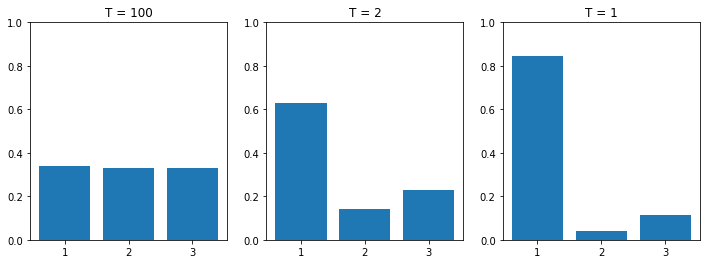

In [17]:
# Softmax distribution at various temperatures with the logit: (3,0,1)
import numpy as np
import matplotlib.pyplot as plt

def softmax(a):
    exp = np.exp(a)
    return exp / np.sum(exp)

X = np.arange(1,4)
logit = np.array([3,0,1])
temperatures = [100, 2, 1]

plt.figure(figsize = (12, 4))
for i in range(len(temperatures)):
    plt.subplot(1,3,i+1)
    plt.bar(X, softmax(logit/temperatures[i]))
    plt.title('T = %d' % temperatures[i])
    plt.xticks(X)
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.ylim(0,1)
    
plt.show()

## 2.5.3 Multiclass logistic regression

**Multiclass logistic regression**: Using conditional categorical model, where we use a **linear predictor** of the form $f(\mathbf{x};\theta) = \mathbf{W}x + \mathbf{b}$
- $p(y\vert \mathbf{x};\theta) = Cat(y\vert S(\mathbf{W}x+\mathbf{b}))$

Let $\mathbf{a} = \mathbf{W}x + \mathbf{b}$ be the $C$-dimensional vector of **logits**. Then, 
- $p(y=c \vert \mathbf{x};\theta) = \frac{e^{a_c}}{\Sigma_{c`=1}^C e^{a_c`}}$

If we have just 2 classes, this reduces to binary logistic regression.

## 2.5.4 Log-sum-exp trick
**Problem**: While calculating softmax function, if components of given logit are too large or too small, each exponentials may cause overflow or underflow due to the 64-bit precision of the computer.

**Solution**
- 1. Use the identity: &nbsp; $log\Sigma_{c=1}^C exp(a_c) = m + log\Sigma_{c=1}^C exp(a_c-m) \;\; \forall m$.
- 2. Compute the probabilities using: &nbsp; $p(y=c\vert \mathbf{x}) = exp(a_c - lse(\mathbf{a}))$ &nbsp; where &nbsp; $lse(\mathbf{a}) = log\Sigma_{c=1}^C exp(a_c)$

# 2.6 Univariate Gaussian (normal) distribution

## 2.6.1 Cumulative distribution function
The cdf of the Gaussian is defined as
- $\Phi(y;\mu,\sigma^2) := \int_{-\infty}^y\mathcal{N}(z\vert \mu,\sigma^2)dz = \frac{1}{2}[1+erf(z/\sqrt(2))]$ &nbsp;&nbsp;&nbsp;&nbsp; where $z = (y-\mu)/\sigma$

$erf(u)$ is the **error function** defined as: &nbsp; $erf(u) = \frac{2}{\sqrt{\pi}}\int_0^{\mu}e^{-t^2}dt$

When $\mu = 0$ and $\sigma = 1$, the Gaussian is called the **standard normal distribution**. ($\mathcal{N}(0,1)$)

## 2.6.2 Probability density function
The pdf of the Gaussian is defined as
- $\mathcal{N}(y\vert \mu, \sigma^2) := \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{1}{2\sigma^2}(y-\mu)^2}$

If a random variable $Y \sim \mathcal{N}(\mu, \sigma^2)$, then
- $\mathbb{E}[Y] = \mu$
- $std[Y] = \sigma$

## 2.6.3 Regression
Consider the following conditional Gaussian model of the form:
- $p(y\vert \mathbf{x};\theta) = \mathcal{N}(y\vert f_{\mu}(\mathbf{x};\theta), f_{\sigma}(\mathbf{x},\theta)^2)$

**Homoscedastic regression**: Regression that assumes the variance is **fixed**.
- If we assume the mean is linear function of the input, it is called **linear regression**
    - $p(y\vert \mathbf{x};\theta) = \mathcal{N}(y\vert \mathbf{w}^T\mathbf{x} + b, \sigma^2)$ &nbsp;&nbsp;&nbsp;&nbsp; where $\theta = (\mathbf{w}, b, \sigma^2)$
    
**Heteroscedastic regression**: Regression that let the variance **depend on the input**.
- $p(y\vert \mathbf{x};\theta) = \mathcal{N}(y\vert \mathbf{w}^T_\mu\mathbf{x} + b, \sigma_+(\mathbf{w}_{\sigma}^T\mathbf{x}))$ &nbsp;&nbsp;&nbsp;&nbsp; where $\theta = (\mathbf{w}_{\mu}, \mathbf{w}_{\sigma})$ are the two forms of regression weights.
- $\sigma_+(a) = log(1+e^a)$ &nbsp; is the **softplus function** that maps from $\mathbb{R}$ to $\mathbb{R^+}$.